In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
#import json
#import datetime
import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733441 entries, 0 to 733440
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               733441 non-null  object 
 1   end_date                 733441 non-null  object 
 2   start_time_hourly        733441 non-null  int64  
 3   end_time_hourly          733441 non-null  int64  
 4   start_station_id         733441 non-null  int64  
 5   end_station_id           733441 non-null  int64  
 6   start_latitude           733441 non-null  float64
 7   start_longitude          733441 non-null  float64
 8   end_latitude             733441 non-null  float64
 9   end_longitude            733441 non-null  float64
 10  min_temp                 733441 non-null  float64
 11  max_temp                 733441 non-null  float64
 12  isPrecip                 733441 non-null  bool   
 13  user_type                733441 non-null  object 
 14  dayO

# 2. Descriptive Analytics

In [2]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

In [3]:
#dfPhiladelphia.mean()

In [4]:
#dfPhiladelphia["numOfRentedBikes"].describe()

### 2.1.1 Fleet usage variety per day

In [5]:
######## ((MAYBE ALSO FOR Percentage of used bikes))

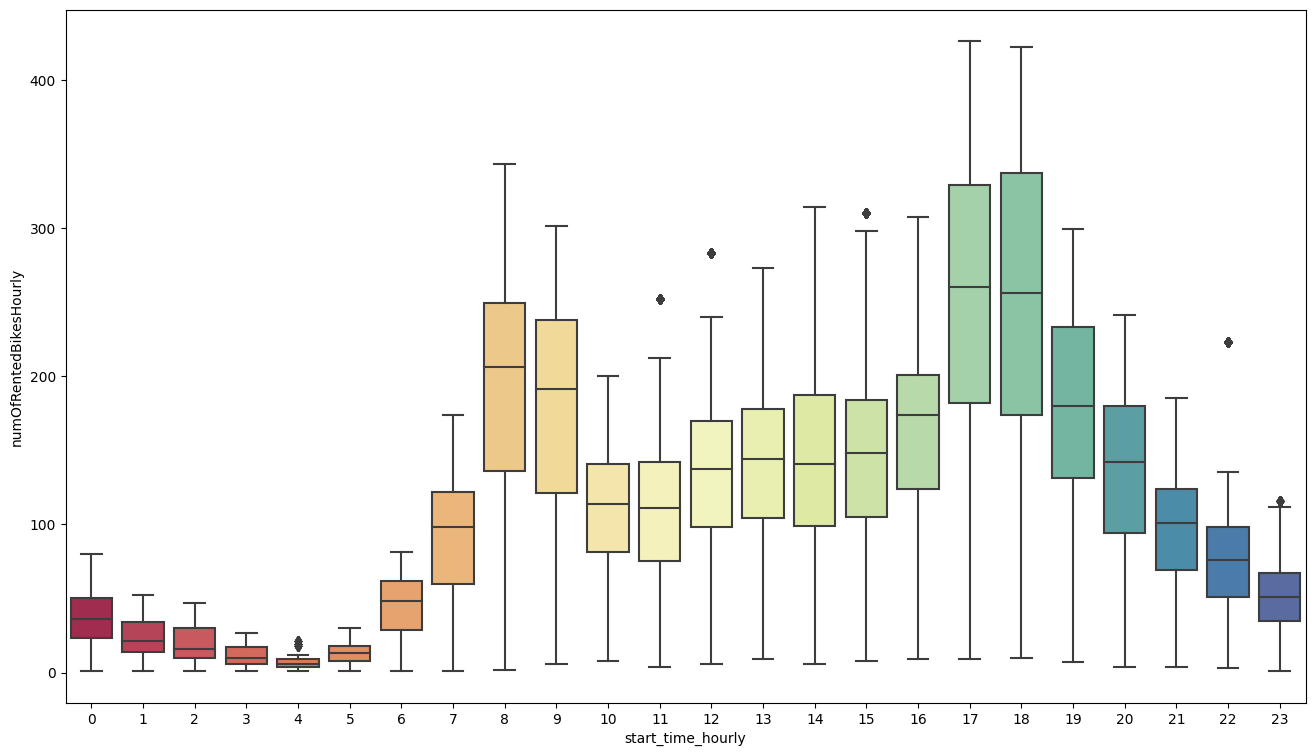

In [6]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Tagsüber () wird mehr ausgeliehen, als Nachts ()
- 17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

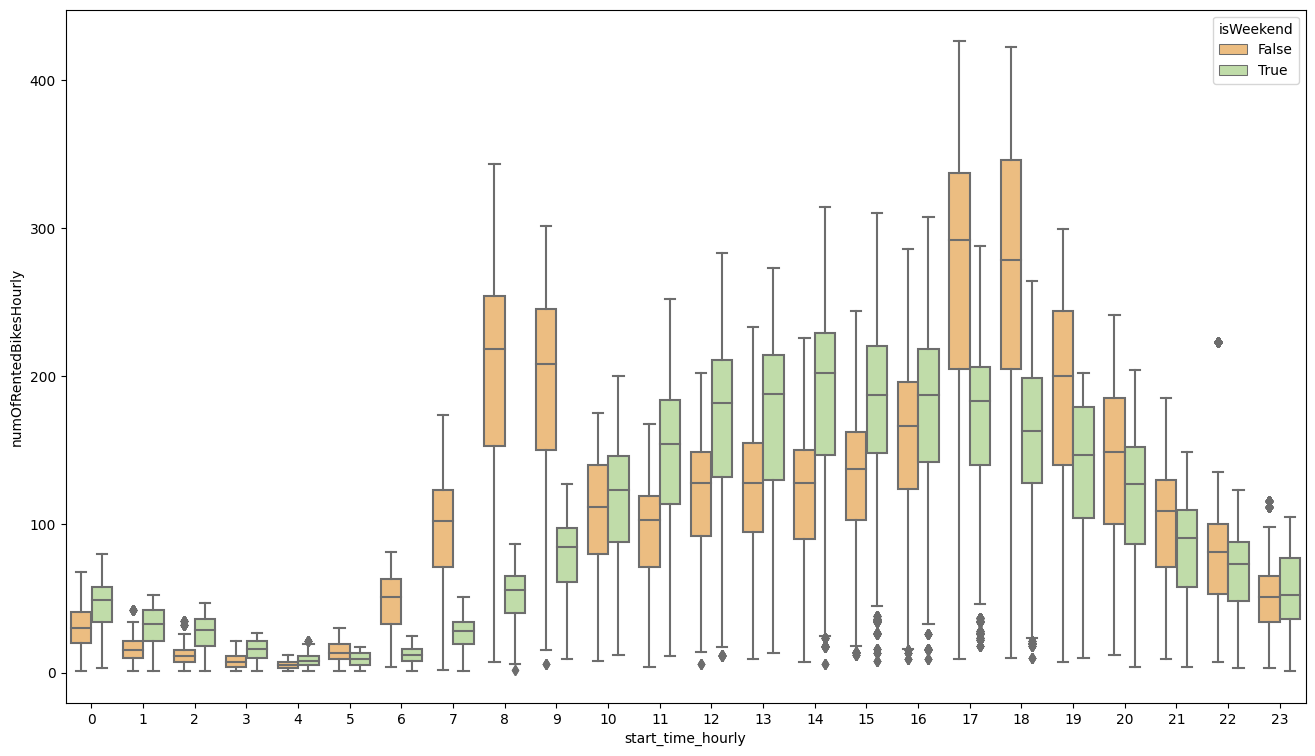

In [7]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
- Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
- Partyfahrer Nachts am Wochende?? -> Next plot

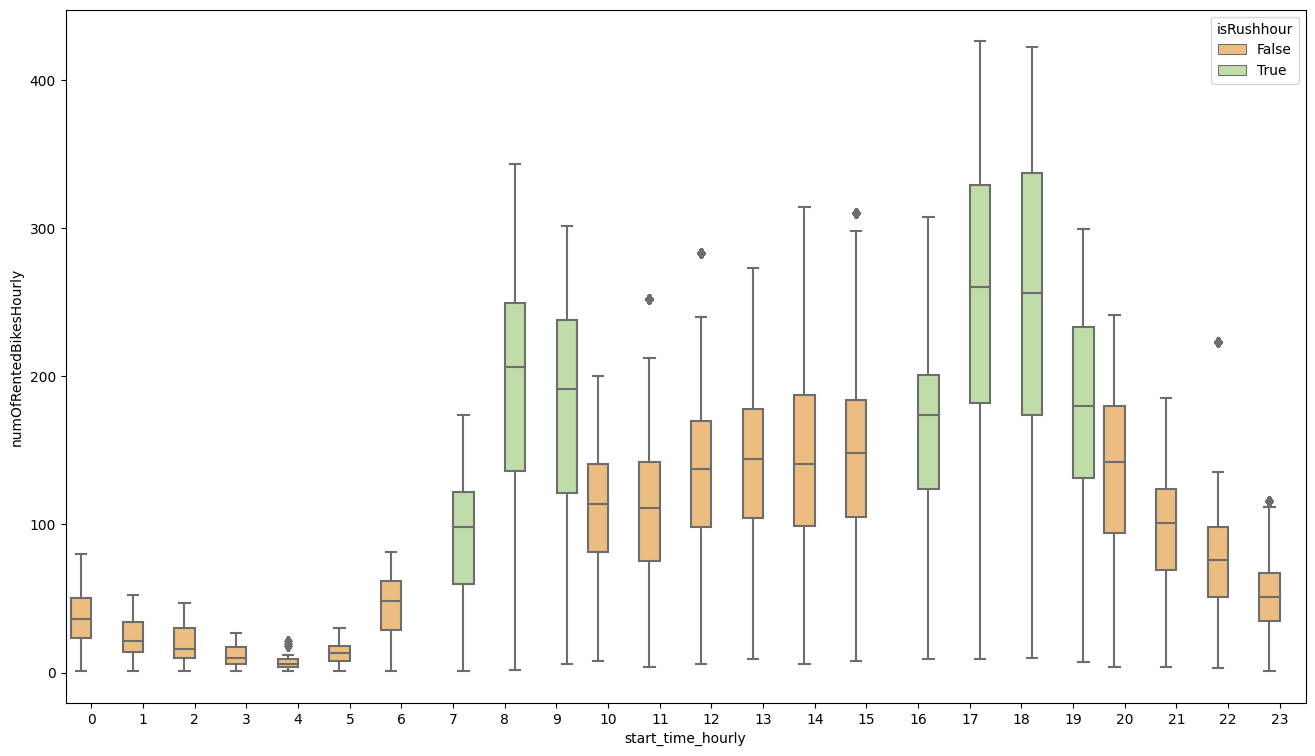

In [8]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

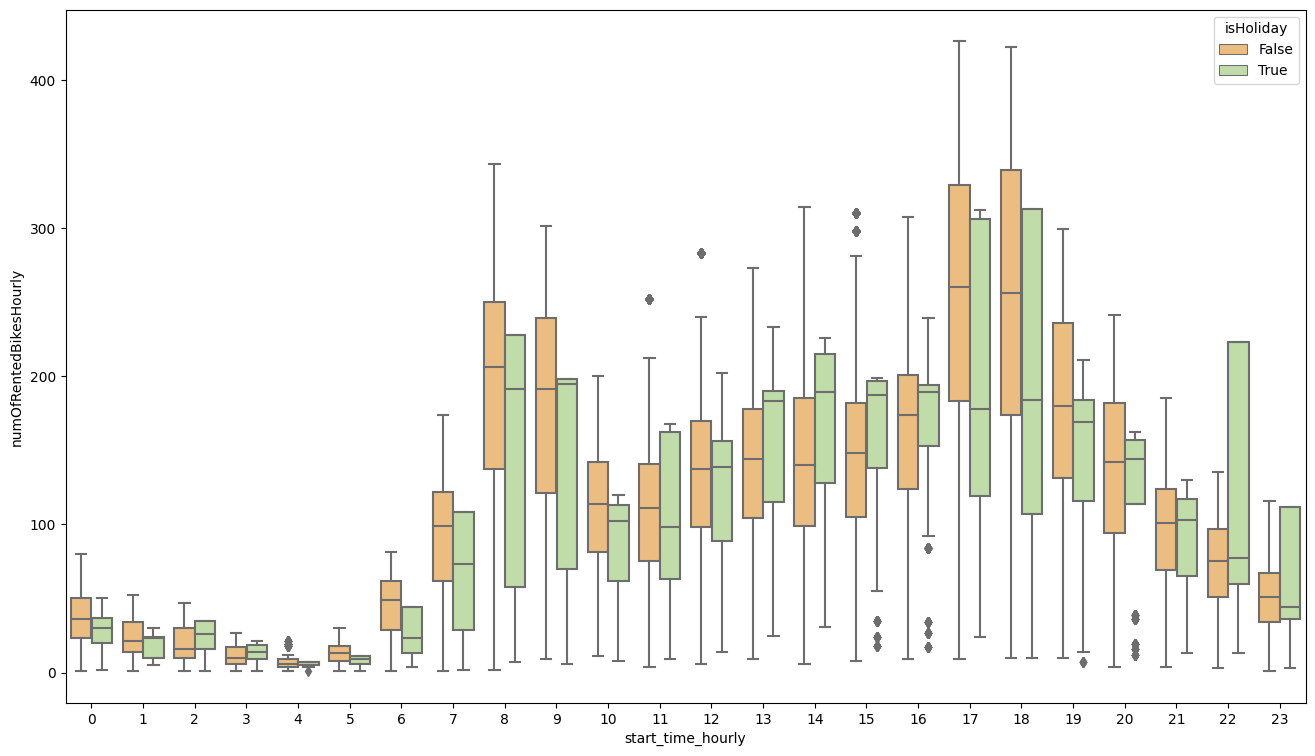

In [9]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

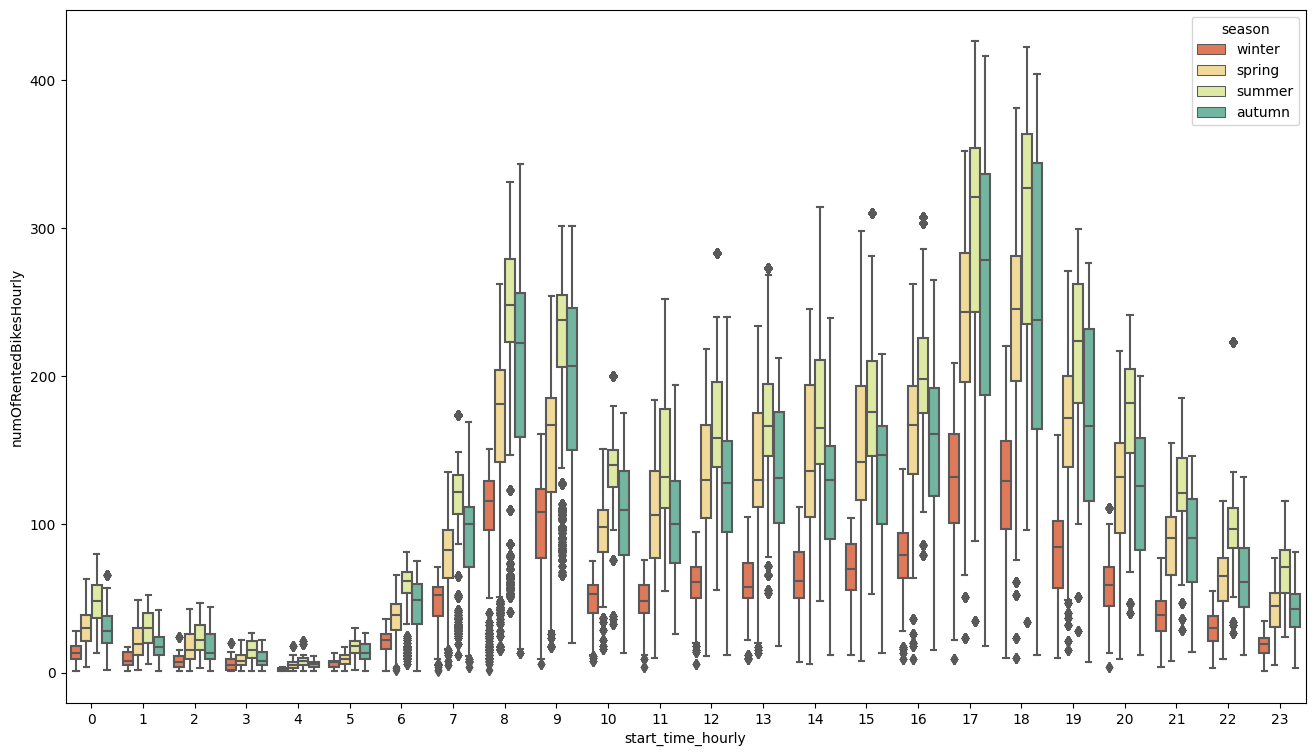

In [10]:
###### vielleicht Linien über mean
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

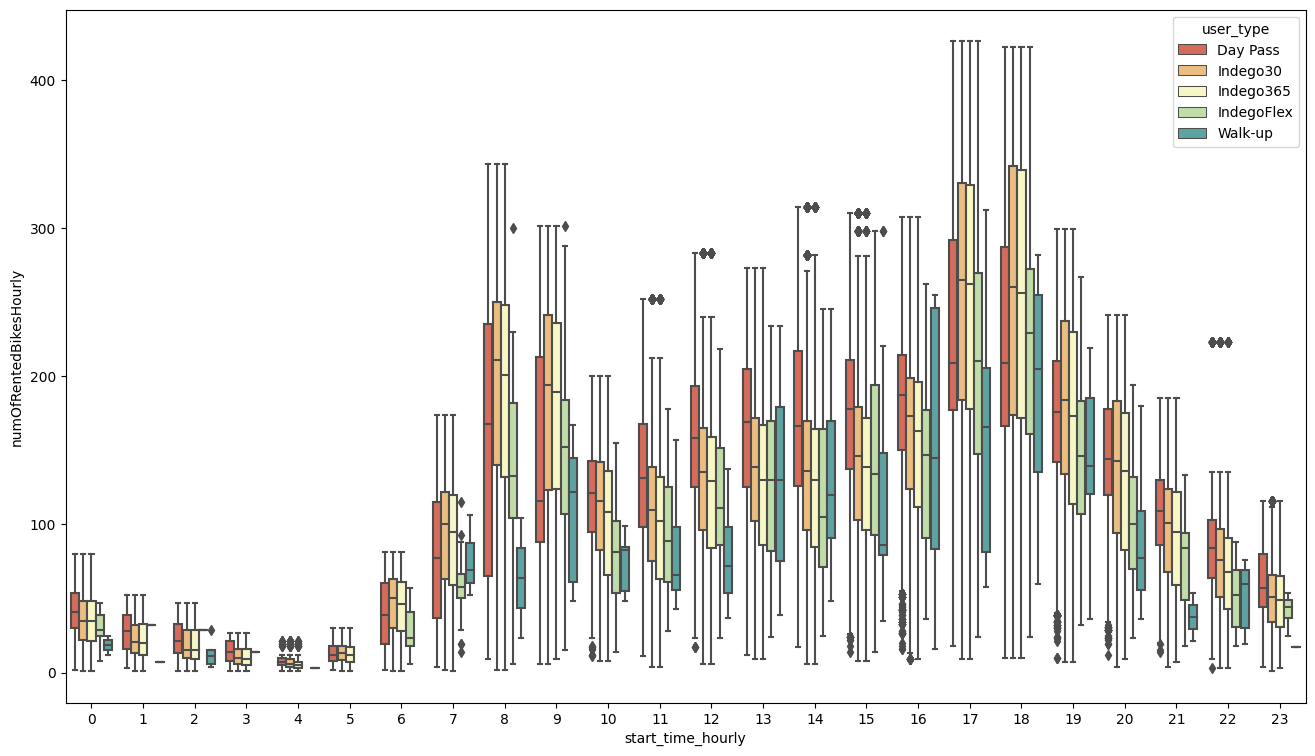

In [11]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

Tarife erklären, z.b. Day Ticket um 8, weil Bahn weg

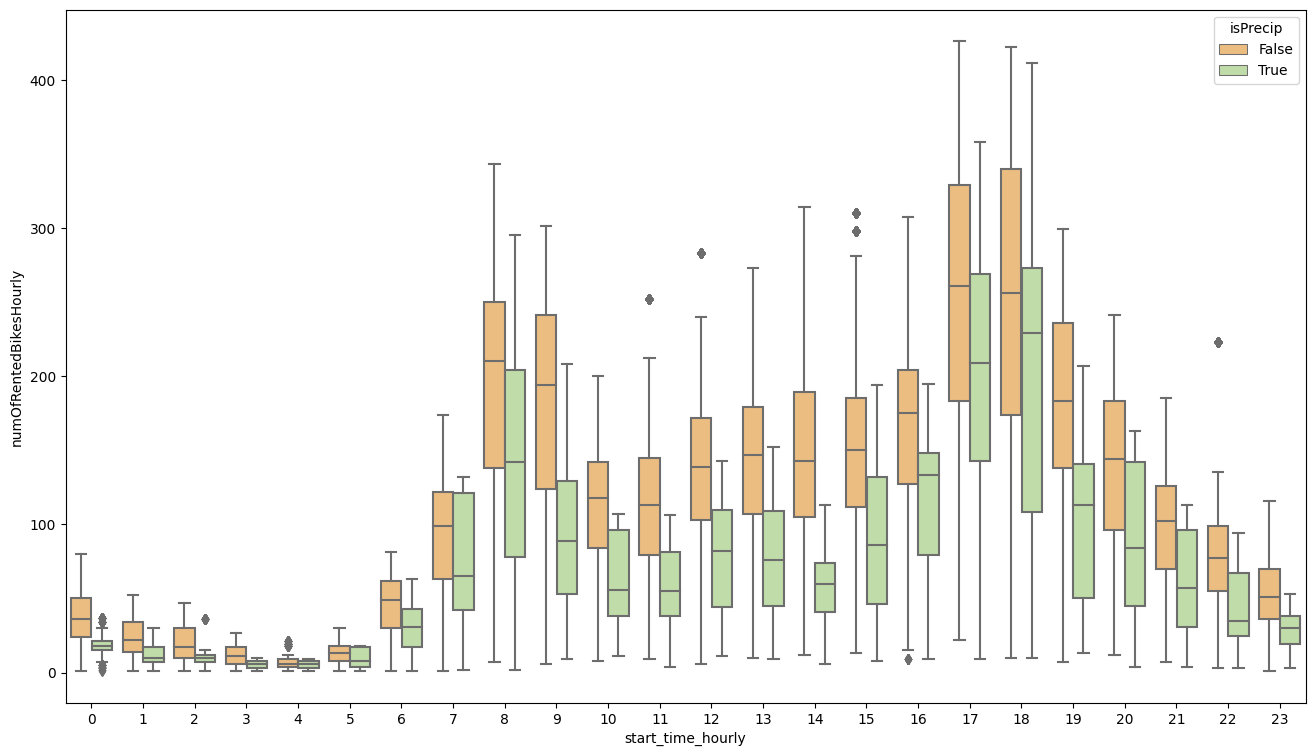

In [12]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG

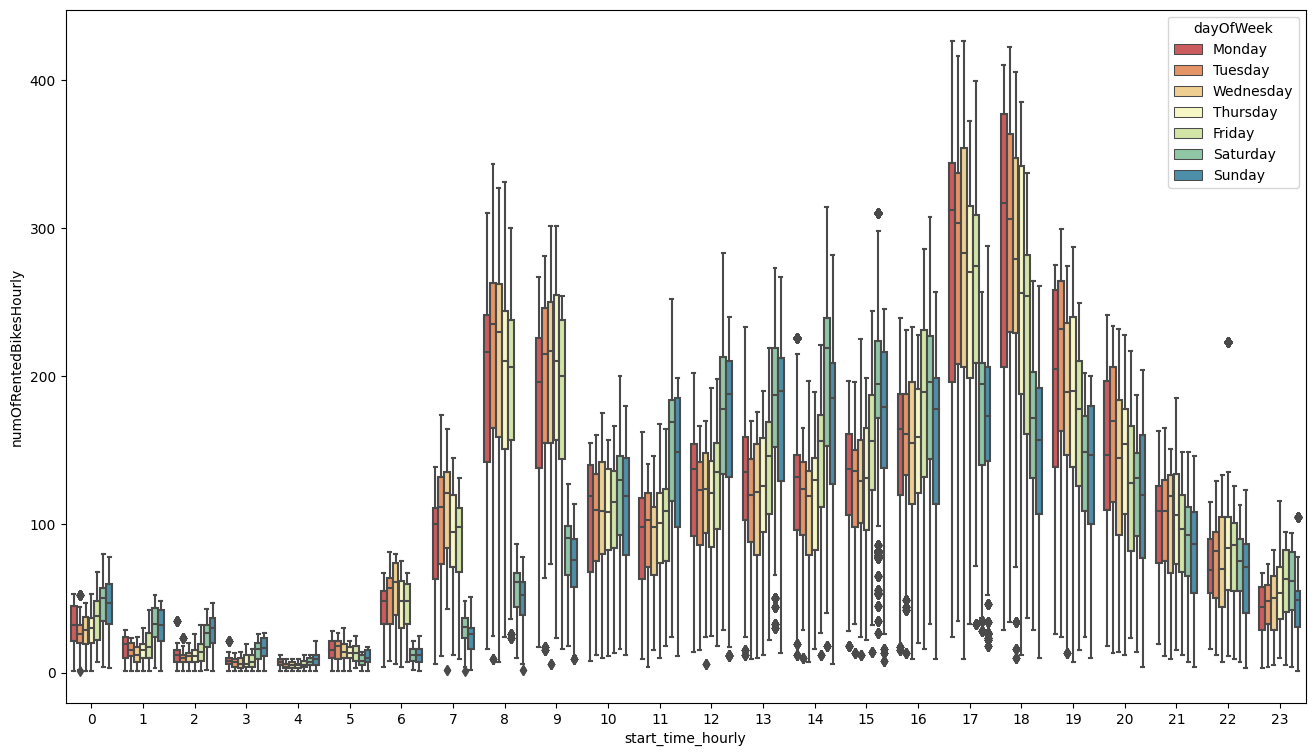

In [13]:
### ALS ÜBERSICHTLICHEN ABSCHLUSS + Überleitung zu Week
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

NETTER TEXT

### 2.1.2 Fleet usage variety per week

In [14]:
# initialize new target_value y="numOfRentedBikesDaily"

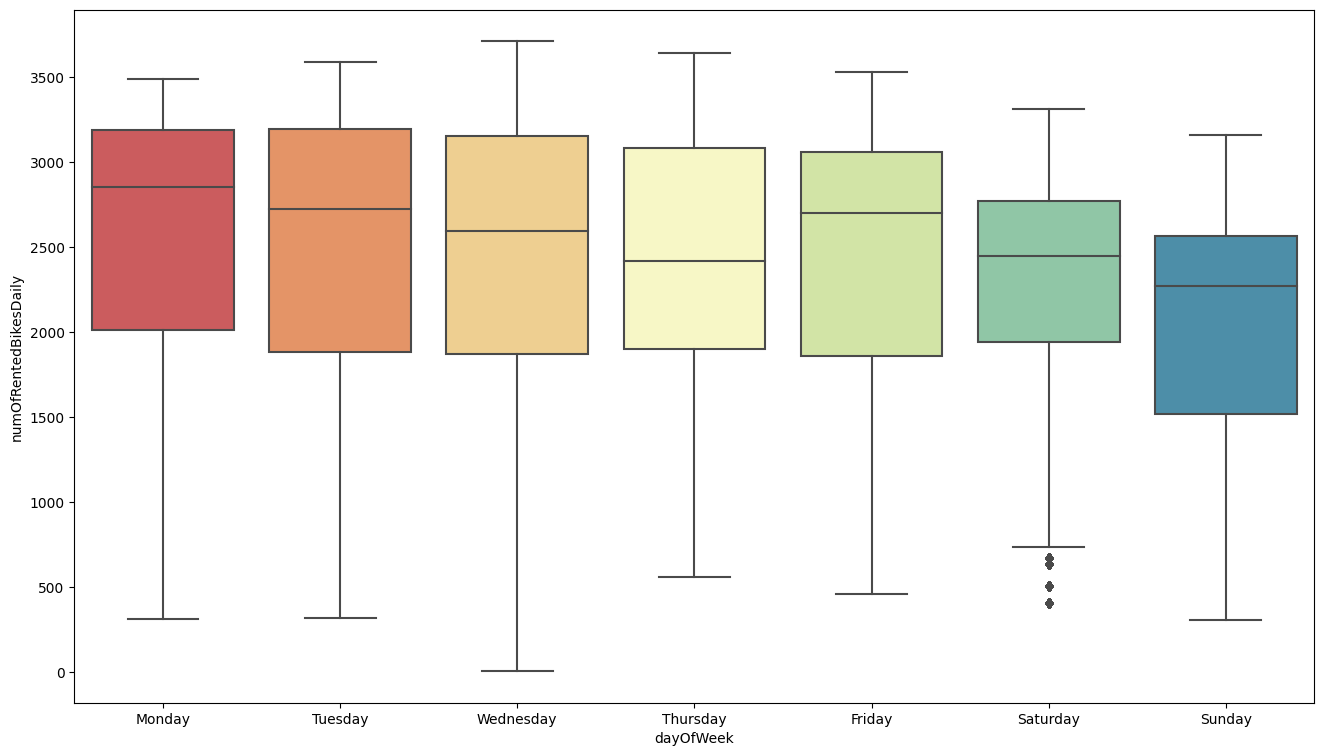

In [15]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- liegt vlt. am Abomodell

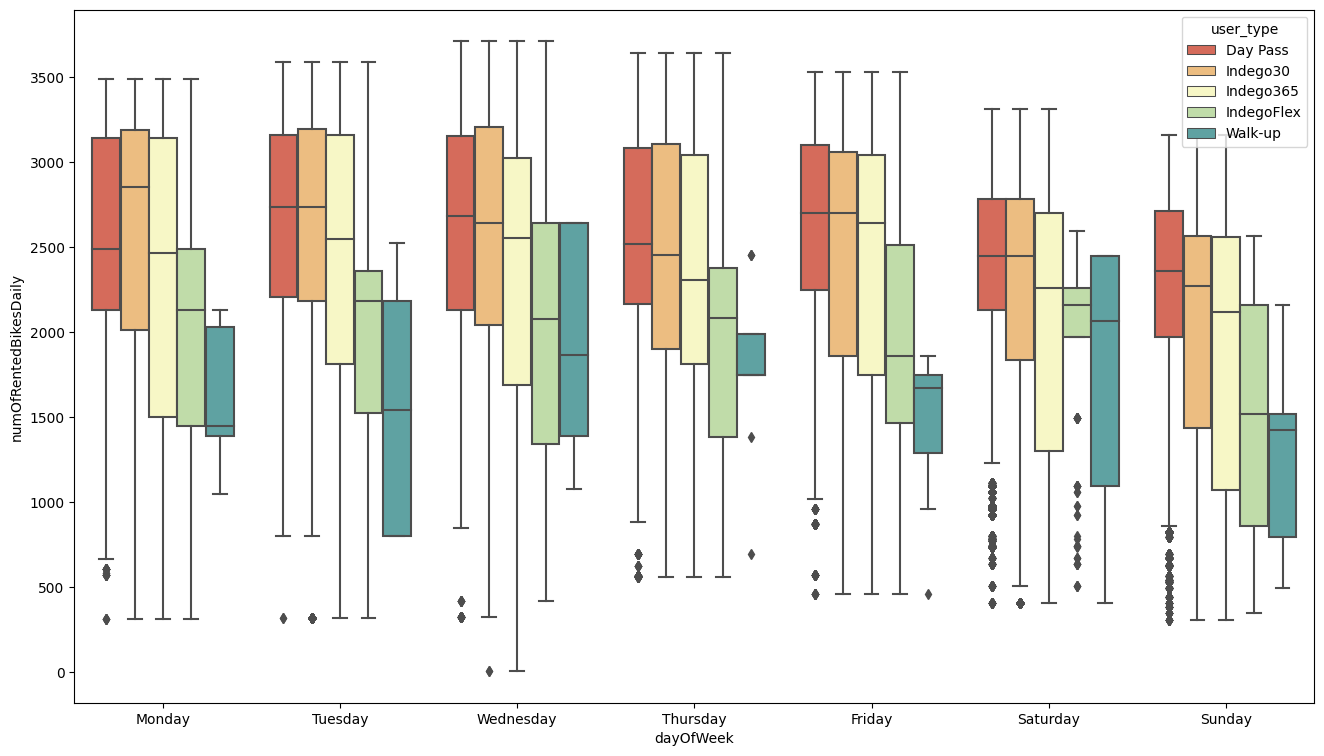

In [16]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

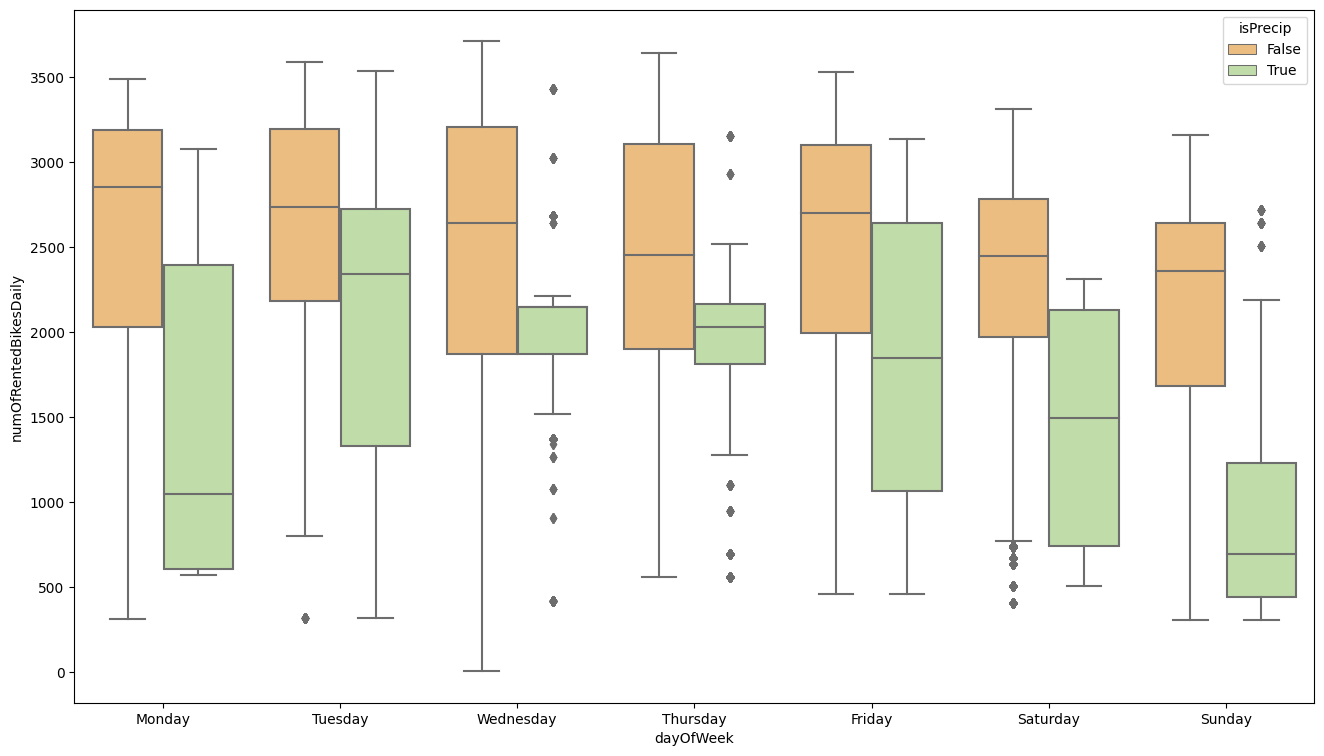

In [17]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [18]:
#SHOWOFF ORDER
#sns.boxplot(x="start_time_hourly",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette,order=[22,23,0,1,2,3,4,5,6],hue="isWeekend")
#fig = plt.gcf()
#fig.set_size_inches(16, 9)
#plt.show()

### 2.1.2 Fleet usage variety during the year

In [19]:
dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,...,isRushhour,tripduration_sec,numOfRentedBikesHourly,numOfRentedBikesDaily,numOfRentedBikesWeekly,numOfRentedBikesMonthly,start_week,start_month,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,39.94509,-75.142500,39.945170,-75.159930,...,False,480,2,797,7932,29696,1,1,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,0,1,3005,3007,39.94733,-75.144030,39.945170,-75.159930,...,False,420,2,797,7932,29696,1,1,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01,2019-01-01,1,1,3166,3169,39.97195,-75.134450,39.953820,-75.142630,...,False,780,8,797,7932,29696,1,1,Frankford & Belgrade,2nd & Race
3,2019-01-01,2019-01-01,1,1,3058,3103,39.96716,-75.170010,39.977139,-75.179398,...,False,540,8,797,7932,29696,1,1,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01,2019-01-01,1,1,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,False,720,8,797,7932,29696,1,1,17th & Sansom,4th & Bainbridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733436,2019-12-31,2020-01-01,23,0,3192,3070,39.96207,-75.141113,39.960620,-75.139830,...,False,2778,28,1189,7932,32990,1,12,2nd & Fairmount,"Spring Garden Station, MFL"
733437,2019-12-31,2020-01-01,23,0,3086,3025,39.94019,-75.166910,39.937240,-75.161200,...,False,227,28,1189,7932,32990,1,12,Broad & Christian,11th & Washington
733438,2020-01-01,2020-01-01,0,0,3052,3068,39.94732,-75.156950,39.935490,-75.167110,...,False,449,3,3,7932,29696,1,1,9th & Locust,Broad & Federal
733439,2020-01-01,2020-01-01,0,0,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,False,527,3,3,7932,29696,1,1,17th & Sansom,4th & Bainbridge


C:\Users\fabia\AppData\Local\Temp\ipykernel_18664\4120492732.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)


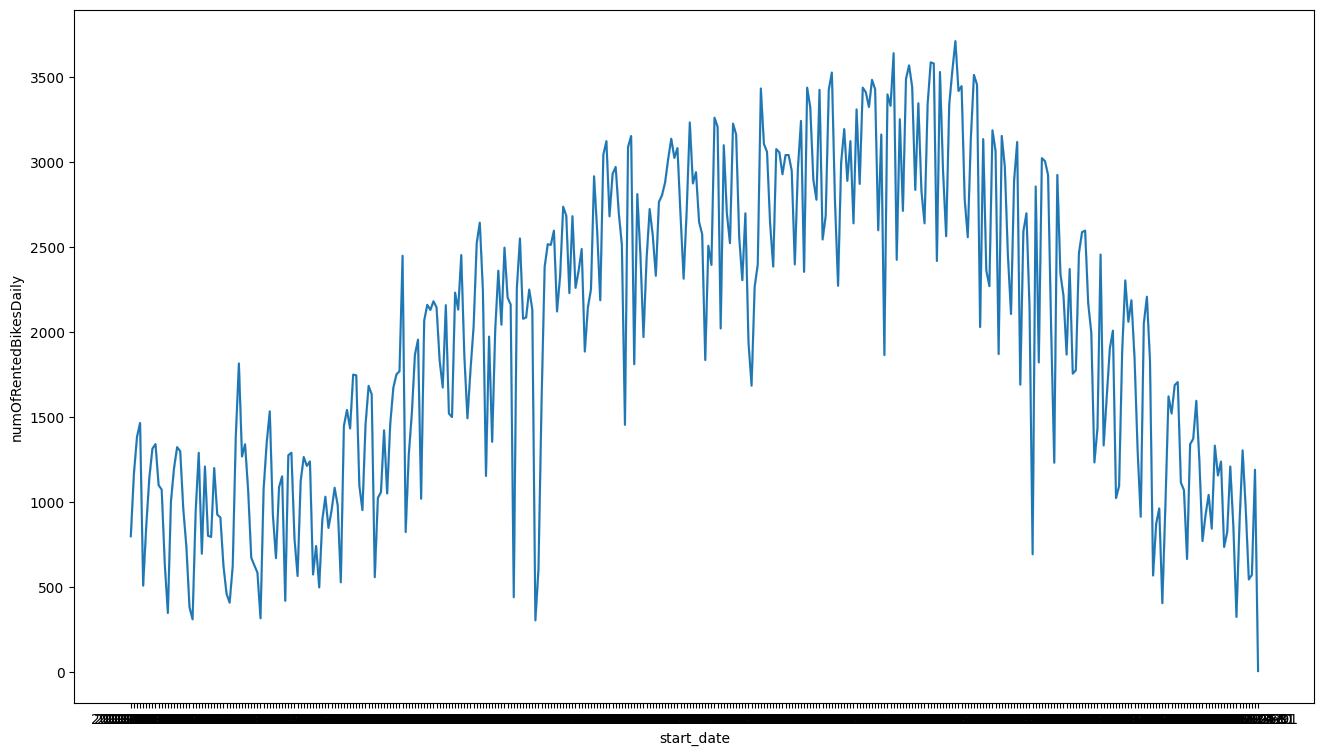

In [20]:
sns.lineplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

C:\Users\fabia\AppData\Local\Temp\ipykernel_18664\2268627372.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="start_week",y="numOfRentedBikesWeekly",data=dfPhiladelphia,palette=palette)


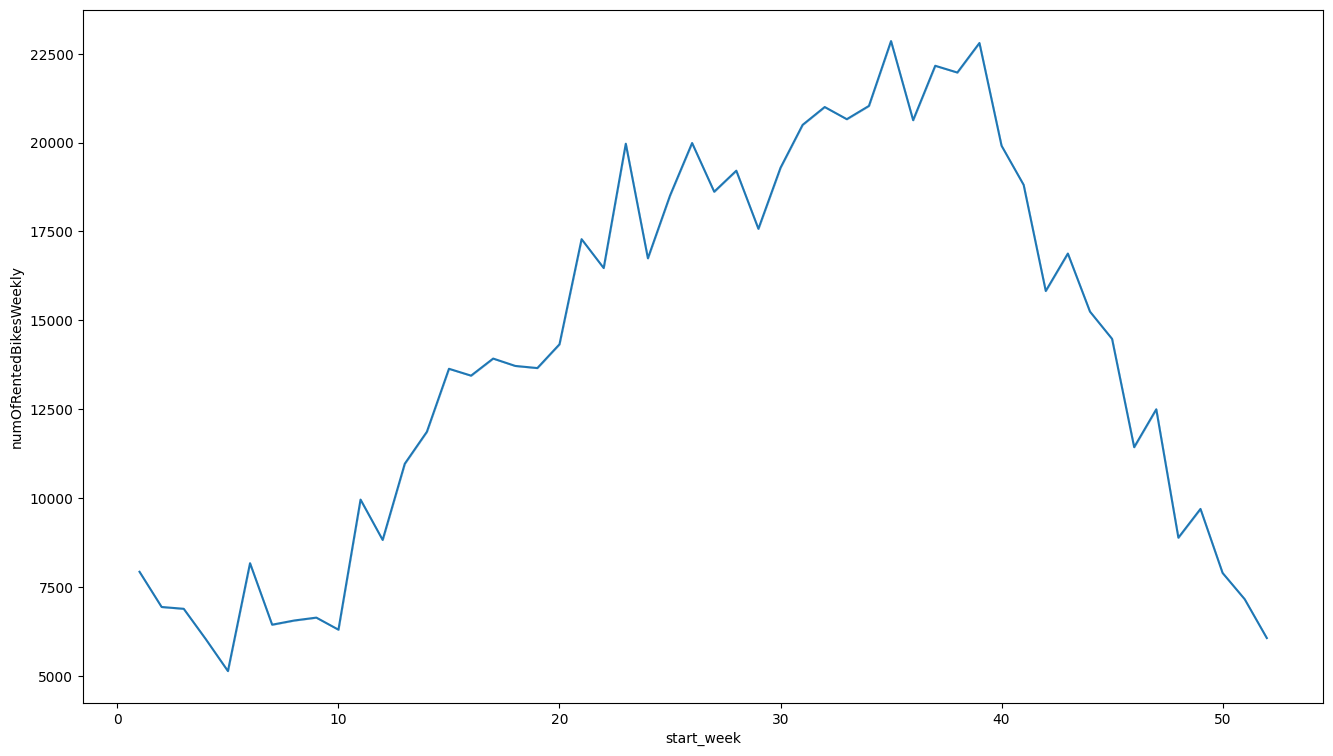

In [21]:
sns.lineplot(x="start_week",y="numOfRentedBikesWeekly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

C:\Users\fabia\AppData\Local\Temp\ipykernel_18664\721194036.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="start_month",y="numOfRentedBikesMonthly",data=dfPhiladelphia,palette=palette)


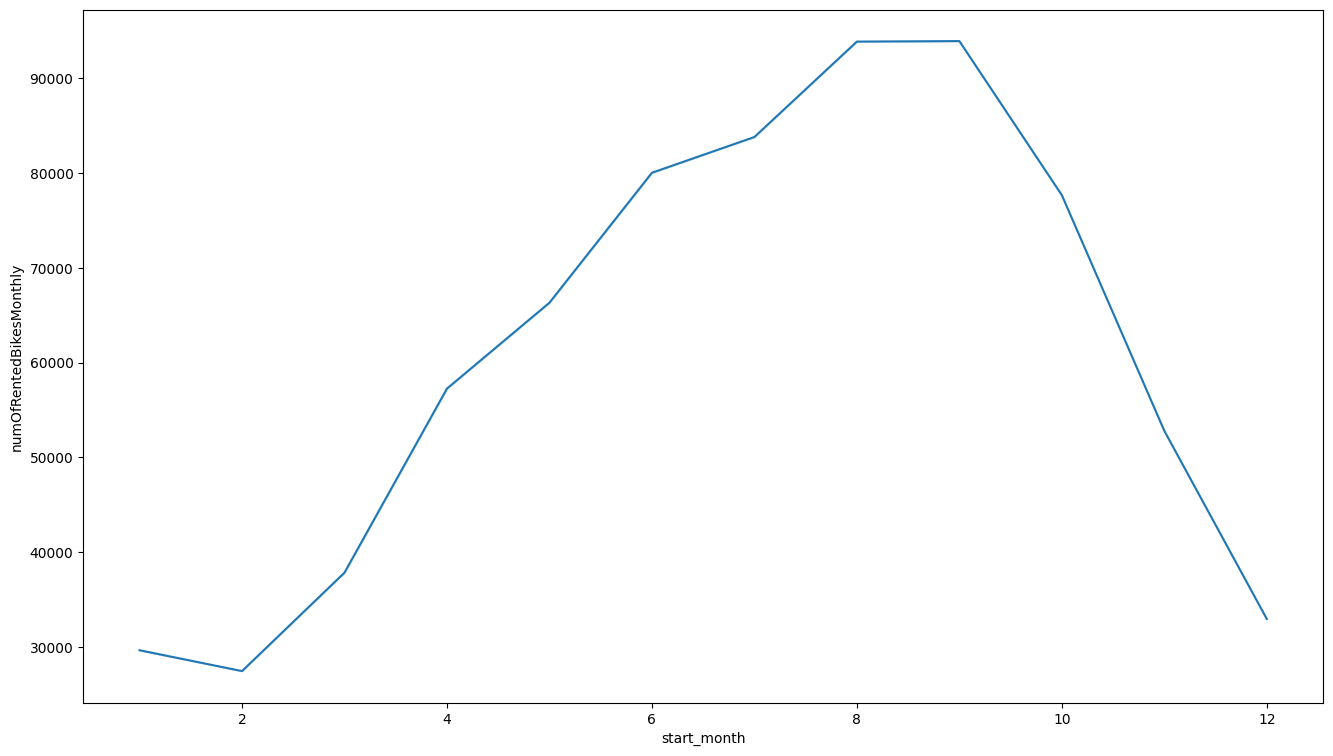

In [22]:
sns.lineplot(x="start_month",y="numOfRentedBikesMonthly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

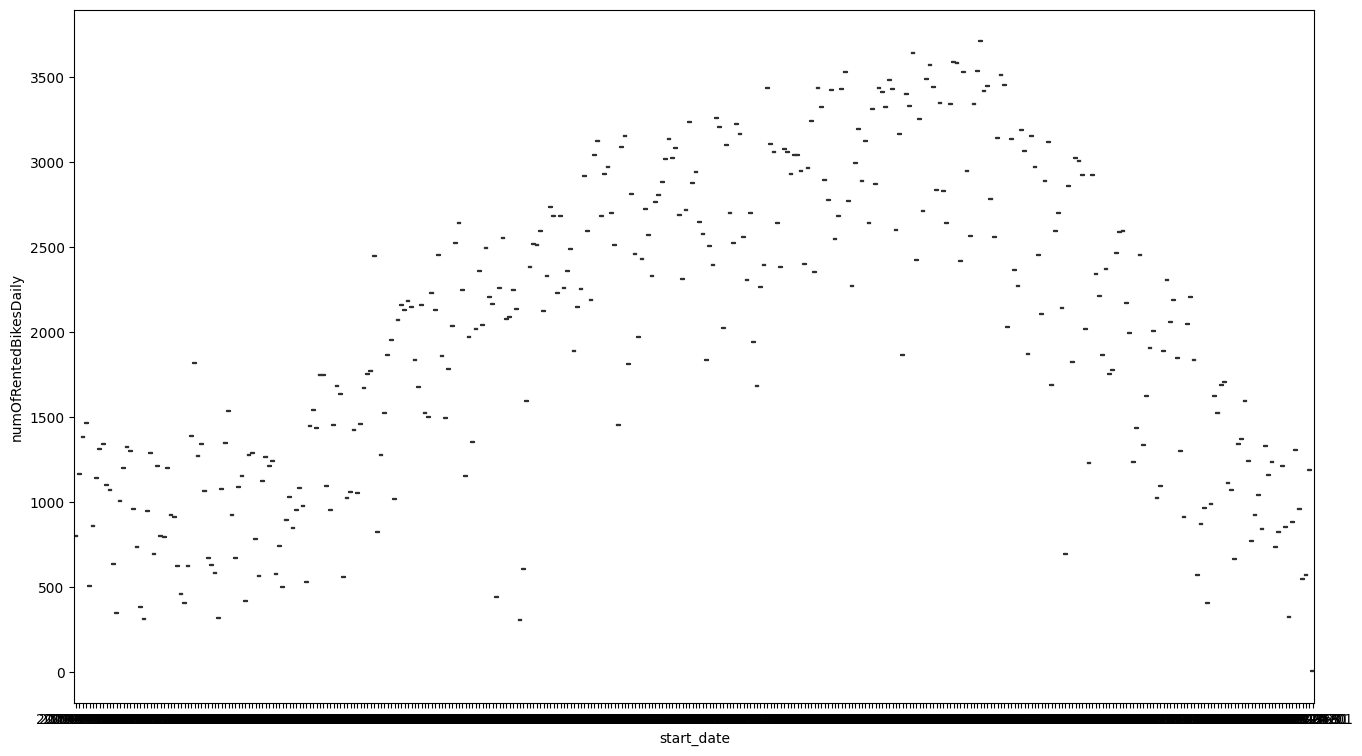

In [23]:
sns.boxplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [24]:
# Temperaturschwankungen & Bike usage

C:\Users\fabia\AppData\Local\Temp\ipykernel_18664\4104671298.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="min_temp",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)


<AxesSubplot: xlabel='min_temp', ylabel='numOfRentedBikesDaily'>

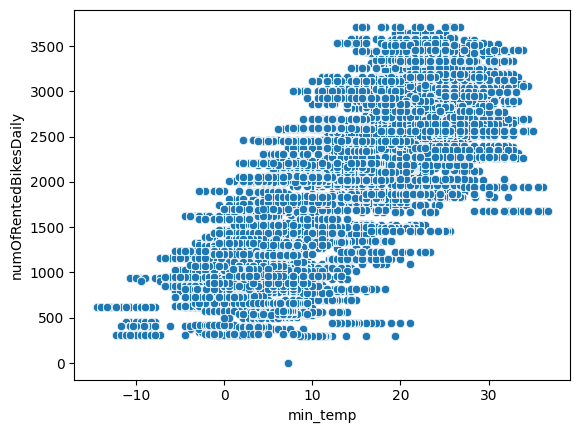

In [26]:
sns.scatterplot(x="min_temp",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

In [27]:
start_stations = dfPhiladelphia.groupby(['start_station_id'])['numOfRentedBikesDaily'].count().reset_index()
start_stations.sort_values(by=['numOfRentedBikesDaily'], ascending=False, inplace=True, ignore_index=True)

In [28]:
#most popular start stations
start_stations.head()

,start_station_id,numOfRentedBikesDaily
0,3010,14775
1,3054,14341
2,3045,13115
3,3190,12728
4,3057,11736


In [29]:
#least popular start stations
start_stations.tail()

,start_station_id,numOfRentedBikesDaily
142,3205,123
143,3095,101
144,3105,21
145,3042,20
146,3036,10


In [30]:
end_stations = dfPhiladelphia.groupby(['end_station_id'])['numOfRentedBikesDaily'].count().reset_index()
end_stations.sort_values(by=['numOfRentedBikesDaily'], ascending=False, inplace=True, ignore_index=True)

In [31]:
#most popular end stations
end_stations.head()

,end_station_id,numOfRentedBikesDaily
0,3010,14561
1,3054,14349
2,3045,13113
3,3190,12923
4,3032,12184


In [32]:
#least popular end stations
end_stations.tail()

,end_station_id,numOfRentedBikesDaily
142,3205,147
143,3095,76
144,3042,22
145,3105,17
146,3036,9


## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected
- KPIs for the city/year in your dataset and visualize them over time. Which trends do you observe? How do you explain them?

### 2.3.1 KPI: `Utilization`

### 2.3.2 KPI: `Revenue`

### 2.3.3 KPI: `Coverage`

### 2.3.4 KPI: `...`

### 2.3.5 KPI: `...`

### 2.3.6 Dashboard

In [ ]:
#sns.pairplot(tips, 
#             hue="sex", palette="magma",diag_kind ='kde', )
#plt.show()